## 习题 1.3

数据：

In [1]:
data <- read.table("./ex_1_3.txt", header=TRUE)
data

Year,Nationwide,Rural,Urban
<int>,<int>,<int>,<int>
1978,184,138,405
1979,207,158,434
1980,236,178,496
1981,262,199,562
1982,284,221,576
1983,311,246,603
1984,354,283,662
1985,437,347,802
1986,485,376,920


In [2]:
summary(data)

      Year        Nationwide         Rural            Urban       
 Min.   :1978   Min.   : 184.0   Min.   : 138.0   Min.   : 405.0  
 1st Qu.:1983   1st Qu.: 321.8   1st Qu.: 255.2   1st Qu.: 617.8  
 Median :1988   Median : 727.5   Median : 530.5   Median :1499.5  
 Mean   :1988   Mean   :1117.0   Mean   : 747.9   Mean   :2336.4  
 3rd Qu.:1994   3rd Qu.:1642.2   3rd Qu.:1052.2   3rd Qu.:3675.0  
 Max.   :1999   Max.   :3180.0   Max.   :1973.0   Max.   :6651.0  

In [3]:
attach(data)

方便直接使用 Year, Nationwide, Rural, Urban 这几个变量。

#### (1)

**均值**：

In [4]:
c(mean(Nationwide), mean(Rural), mean(Urban))

[1] 1117.0000  747.8636 2336.4091

或者，R 提供有一个更方便的函数 `colMeans`，可以直接计算 data frame 各列均值 (`data[-1]` 排除了第一列 Year)：

In [5]:
colMeans(data[-1])

Nationwide      Rural      Urban 
 1117.0000   747.8636  2336.4091

colMeans 函数等价于如下 apply:

In [6]:
apply(data[-1], MARGIN=2, FUN=mean)

Nationwide      Rural      Urban 
 1117.0000   747.8636  2336.4091

注：`MARGIN = 2` 就是取列。

**方差**：

In [7]:
apply(data[-1], 2, var)

Nationwide      Rural      Urban 
 1031680.3   399673.8  4536136.4

**标准差**：

In [8]:
apply(data[-1], 2, sd)

Nationwide      Rural      Urban 
 1015.7166   632.1976  2129.8208

**变异系数**：

In [9]:
cv <- function(x) sd(x)/mean(x)

apply(data[-1], 2, cv)

Nationwide      Rural      Urban 
 0.9093255  0.8453381  0.9115787

**偏度**（skewness）：

可以调用一个库完成计算：

In [10]:
# install.packages("psych")
library(psych)

In [11]:
# g1 <- function(x) skew(x, type=2)  # g1、g2 是用 type=2: seehelp(skew)

# or 按照书上（P6）的手写这个函数
g1 <- function(x) {
    n <- length(x)
    
    A <- n / ((n-1) * (n-2))
    B <- 1 / sd(x)^3
    S <- sum((x - mean(x))^3)
    
    A * B * S
}

apply(data[-1], 2, g1)

Nationwide      Rural      Urban 
 1.0248472  1.0125612  0.9704641

**峰度**：

In [12]:
# g2 <- function(x) kurtosi(x, type=2)  # help(kurtosi)

g2 <- function(x) {
    n <- length(x)
    
    A <- (n * (n+1)) / ((n-1) * (n-2) * (n-3))
    B <- 1 / sd(x)^4
    S <- sum((x - mean(x))^4)
    C <- (3 * (n-1)^2) / ((n-2) * (n-3))
    
    A * B * S - C
}

apply(data[-1], 2, g2)

Nationwide      Rural      Urban 
-0.4572412 -0.4514441 -0.5731621

注：实际上，psych 包提供了一个 `describe` 函数，可以一次性得到各种常用值：

In [13]:
describe(data[-1], type=2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nationwide,1,22,1117.0000,1015.7166,727.5,1001.7222,673.8417,184,3180,2996,1.0248472,-0.4572412,216.5515
Rural,2,22,747.8636,632.1976,530.5,682.7222,469.9842,138,1973,1835,1.0125612,-0.4514441,134.7850
Urban,3,22,2336.4091,2129.8208,1499.5,2094.1111,1379.5593,405,6651,6246,0.9704641,-0.5731621,454.0793


#### (2)

**中位数**：

In [14]:
apply(data[-1], 2, median)

Nationwide      Rural      Urban 
     727.5      530.5     1499.5

**四分位距**：

In [15]:
apply(data[-1], 2, quantile)

,Nationwide,Rural,Urban
0%,184.00,138.00,405.00
25%,321.75,255.25,617.75
50%,727.50,530.50,1499.50
75%,1642.25,1052.25,3675.00
100%,3180.00,1973.00,6651.00


五数：

In [16]:
fn <- apply(data[-1], 2, fivenum)
fn

Nationwide,Rural,Urban
184.0,138.0,405.0
311.0,246.0,603.0
727.5,530.5,1499.5
1746.0,1118.0,3891.0
3180.0,1973.0,6651.0


四分位极差：

In [17]:
R1 <- function(Q3, Q1) Q3 - Q1

R1(Q3=fn[4,], Q1=fn[2,])

Nationwide      Rural      Urban 
      1435        872       3288

三均值：

In [18]:
M3 <- function(Q1, M, Q3) Q1/4 + M/2 + Q3/4

M3(Q1=fn[2,], M=fn[3,], Q3=fn[4,])

Nationwide      Rural      Urban 
    878.00     606.25    1873.25

#### （3）直方图

In [19]:
histogram <- function(x, xname="x") {
    hist(x, prob=TRUE, main=paste("Histogram of" , xname))
    lines(density(x))
    rug(x) # show the actual data points
}

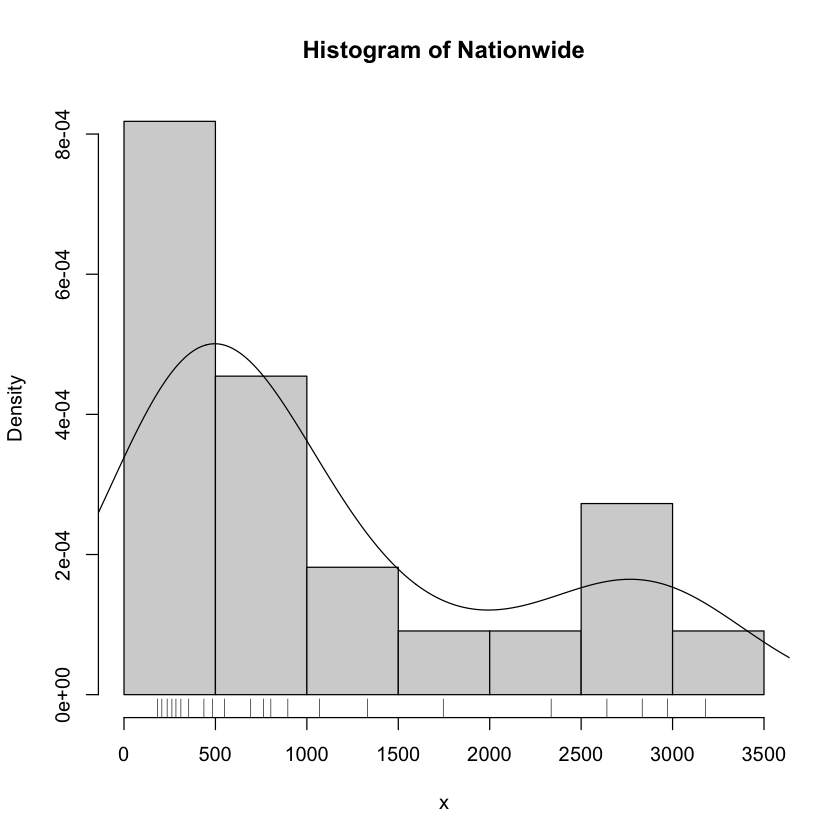

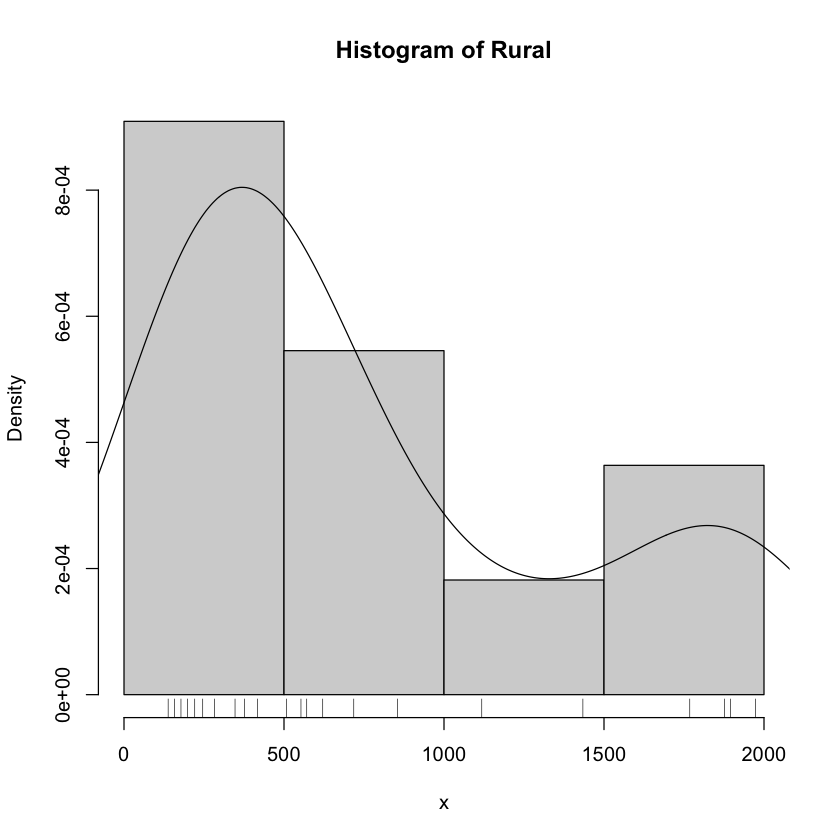

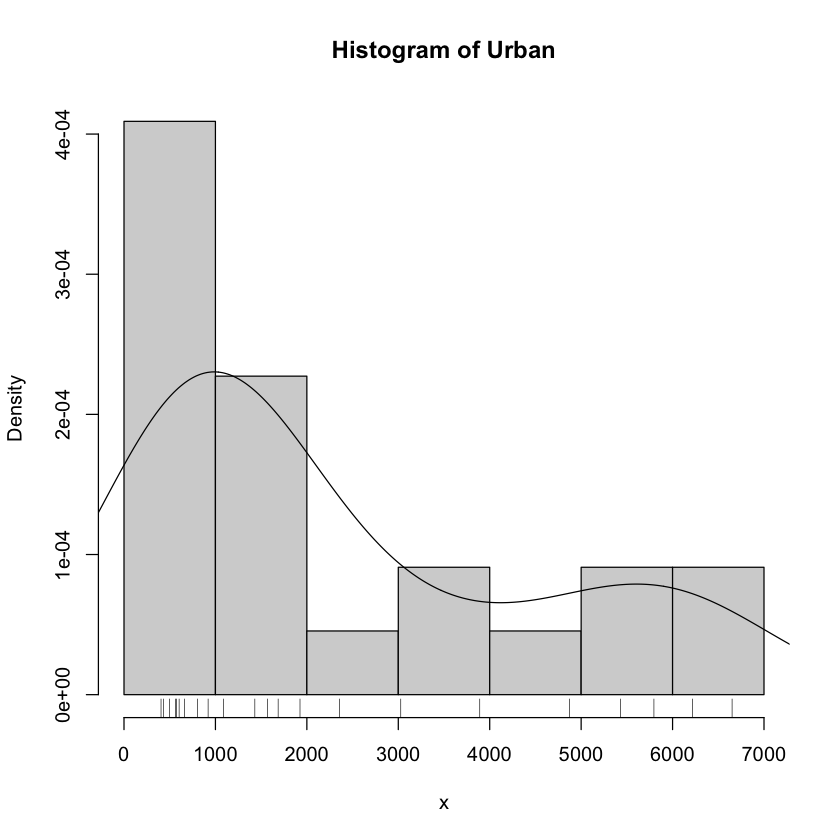

In [20]:
# layout(matrix(c(1,2,3), nr=1, byrow=T))
histogram(Nationwide, xname="Nationwide")
histogram(Rural, xname="Rural")
histogram(Urban, xname="Urban")

#### （4）茎叶图

In [21]:
stem(Nationwide)


  The decimal point is 3 digit(s) to the right of the |

  0 | 22233344567889
  1 | 137
  2 | 368
  3 | 02



In [22]:
stem(Rural)


  The decimal point is 3 digit(s) to the right of the |

  0 | 1222223344
  0 | 566679
  1 | 14
  1 | 899
  2 | 0



In [23]:
stem(Urban)


  The decimal point is 3 digit(s) to the right of the |

  0 | 44566678914679
  2 | 409
  4 | 948
  6 | 27



#### (5). 异常值

In [24]:
abnormal <- function(x) {
    fn <- fivenum(x);
    Q1 <- fn[2];  Q3 <- fn[4];
    
    R1 <- Q3 - Q1
    
    QD <- Q1 - 1.5 * R1
    QU <- Q3 + 1.5 * R1
    
    x[(x < QD) | (x > QU)]
}

In [25]:
apply(data[-1], 2, abnormal)

integer(0)

结果为空：没有异常值。

In [26]:
detach(data)